#Project: Exploring Food Nutrition Patterns

**Objective:**
Analyze the nutritional content of various foods using the CORGIS Food dataset. The purpose is to discover patterns and answer key questions related to protein, fat, and carbohydrate content across different foods and categories, using data science tools and techniques.

**Analytical Questions:**
1. Which foods have the highest and lowest protein, fat, and carbohydrate content?
2. How do average nutrient values differ among the most common food categories?
3. What relationships exist between foods' protein and fat content?
4. Can similar foods be grouped by their nutrient profiles using clustering?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('food.csv')
data.head()


,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


#Data Acquisition and Preparation

I used the CORGIS Food dataset, which provides nutrient information for thousands of foods. After loading the data, I performed basic cleaning, selecting relevant columns, checking for missing values, and focusing on the ten most common food categories to ensure clear visualization and comparison.


In [2]:
print(data.columns)


Index(['Category', 'Description', 'Nutrient Data Bank Number',
       'Data.Alpha Carotene', 'Data.Beta Carotene', 'Data.Beta Cryptoxanthin',
       'Data.Carbohydrate', 'Data.Cholesterol', 'Data.Choline', 'Data.Fiber',
       'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Niacin',
       'Data.Protein', 'Data.Retinol', 'Data.Riboflavin', 'Data.Selenium',
       'Data.Sugar Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat',
       'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid',
       'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium',
       'Data.Major Minerals.Phosphorus', 'Data.Major Minerals.Potassium',
       'Data.Major Minerals.Sodium', 'Data.Major Minerals.Zinc',
       'Data.Vitamins.Vitamin A - RAE', 'Data.Vitamins.Vitamin B12',
       'Data.Vitamins.Vitamin B6', 'Data.Vitamins.Vitamin C',
       'Data.Vitamins.Vitamin E', 'Data.Vitamins.

#Exploratory Analysis: Nutrient Extremes

I identified the foods with the highest and lowest values for protein, fat, and carbohydrate. This comparison reveals which foods are most and least nutrient-dense and highlights differences in macronutrient profiles across products.


In [3]:
# Top 10 highest protein foods
protein_sorted = data[['Description', 'Data.Protein']].sort_values(by='Data.Protein', ascending=False)
print('Top 10 highest protein foods:')
print(protein_sorted.head(10))

print('Bottom 10 lowest protein foods:')
print(protein_sorted.tail(10))


Top 10 highest protein foods:
                                           Description  Data.Protein
7022           Nutritional powder mix, whey based, NFS         78.13
7025              Nutritional powder mix, protein, NFS         78.13
1528                                Tuna, fresh, dried         76.25
7010  Nutritional powder mix (EAS Whey Protein Powder)         66.67
1468                                     Salmon, dried         64.06
1306                                Cod, dried, salted         62.82
1249                        Fish, NS as to type, dried         62.82
826                                    Pork skin rinds         61.30
1584                                      Squid, dried         58.94
7013                  Nutritional powder mix (Isopure)         58.14
Bottom 10 lowest protein foods:
                                            Description  Data.Protein
6880  Fruit flavored drink, powdered, not reconstituted           0.0
6882   Sports drink, dry concentrate, n

In [4]:
print(data['Category'].unique()[:20])  # See the first 20 unique values
print(len(data['Category'].unique()))  # Total number of unique categories


['Milk' 'Buttermilk' 'Kefir' "Goat's milk" 'Non-dairy milk' 'Soy milk'
 'Almond milk' 'Rice milk' 'Coconut milk' 'Yogurt' 'Chipotle dip'
 'Dill dip' 'Onion dip' 'Ranch dip' 'Spinach dip' 'Tzatziki dip'
 'Vegetable dip' 'Yogurt parfait' 'Frozen yogurt' 'Frozen yogurt sandwich']
2429


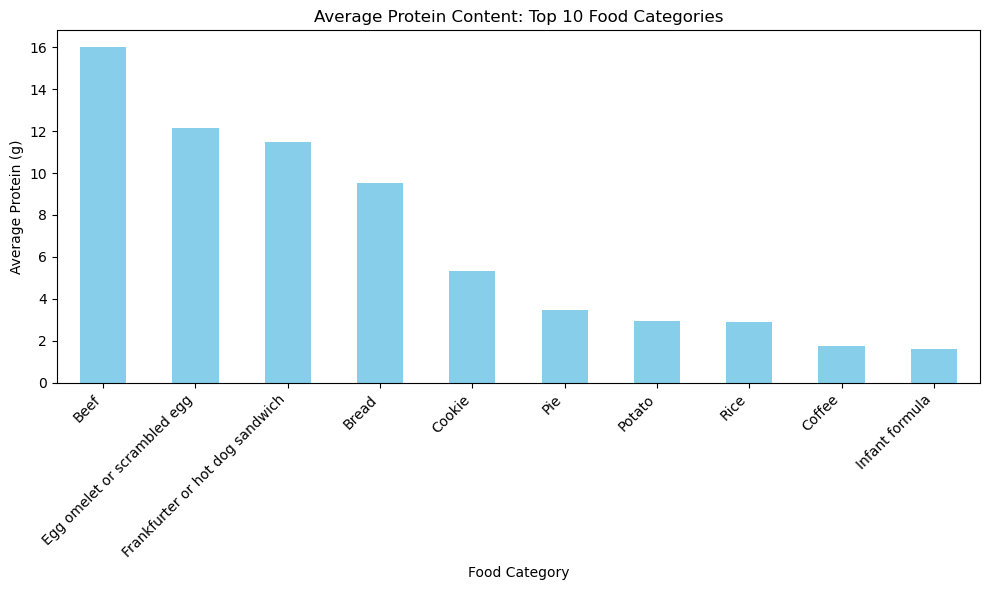

In [5]:
# Find the top 10 most common categories
top_categories = data['Category'].value_counts().head(10).index
subset = data[data['Category'].isin(top_categories)]

# Calculate average protein for just these groups
avg_protein = subset.groupby('Category')['Data.Protein'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_protein.plot(kind='bar', color='skyblue')
plt.title('Average Protein Content: Top 10 Food Categories')
plt.ylabel('Average Protein (g)')
plt.xlabel('Food Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('test.png')
plt.show()


#Interpretation: Average Protein by Food Category

#The bar chart above shows the average protein content for the 10 most frequent food categories in the dataset. It is clear that animal-based protein sources like beef and eggs dominate the top ranks for protein. Processed foods like frankfurters and bread have moderate protein, while baked goods, starchy foods, and beverages have much lower averages. This visualization makes it easy to compare broad nutritional patterns across everyday foods.


In [6]:
# Sort foods by total fat content
totfat_sorted = data[['Description', 'Data.Fat.Total Lipid']].sort_values(by='Data.Fat.Total Lipid', ascending=False)
print('Top 10 highest fat foods:')
print(totfat_sorted.head(10))

print('Bottom 10 lowest fat foods:')
print(totfat_sorted.tail(10))


Top 10 highest fat foods:
                               Description  Data.Fat.Total Lipid
7082  Industrial oil as ingredient in food                 100.0
6354                         Safflower oil                 100.0
6345                    Vegetable oil, NFS                 100.0
6359                        Wheat germ oil                 100.0
6358                            Walnut oil                 100.0
6357                         Sunflower oil                 100.0
6356                           Soybean oil                 100.0
6346                            Almond oil                 100.0
6355                            Sesame oil                 100.0
6353                            Canola oil                 100.0
Bottom 10 lowest fat foods:
                                            Description  Data.Fat.Total Lipid
6859  Vegetable and fruit juice drink, with high vit...                   0.0
104   Chocolate milk, ready to drink, fat free (Nesq...                   0

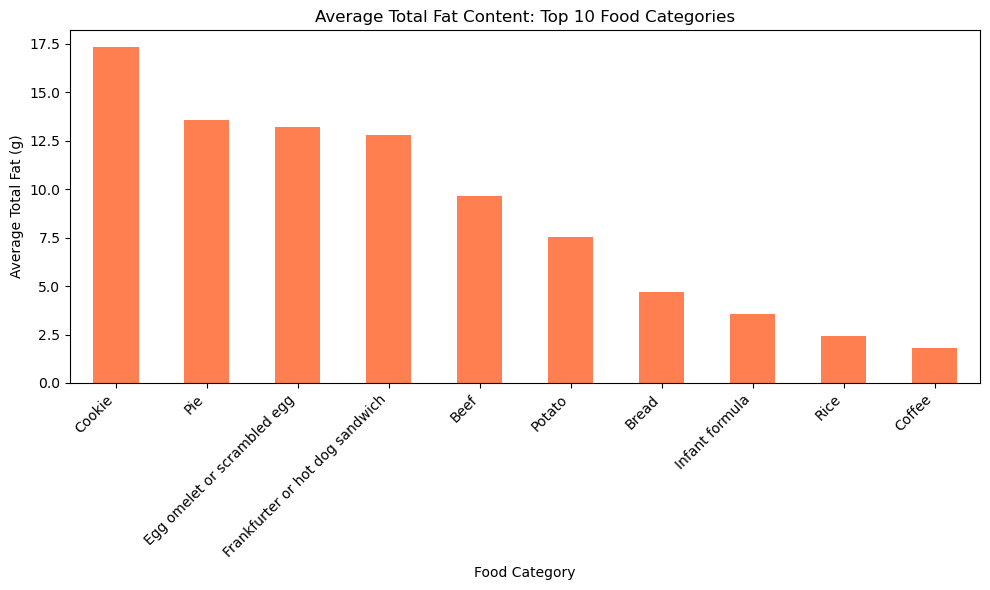

In [7]:
top_categories = data['Category'].value_counts().head(10).index
subset = data[data['Category'].isin(top_categories)]

avg_fat = subset.groupby('Category')['Data.Fat.Total Lipid'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_fat.plot(kind='bar', color='coral')
plt.title('Average Total Fat Content: Top 10 Food Categories')
plt.ylabel('Average Total Fat (g)')
plt.xlabel('Food Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [8]:
# Sort foods by carbohydrate
totcarb_sorted = data[['Description', 'Data.Carbohydrate']].sort_values(by='Data.Carbohydrate', ascending=False)
print('Top 10 highest carbohydrate foods:')
print(totcarb_sorted.head(10))

print('Bottom 10 lowest carbohydrate foods:')
print(totcarb_sorted.tail(10))


Top 10 highest carbohydrate foods:
                                            Description  Data.Carbohydrate
6429                   Sugar substitute, stevia, powder             100.00
6431               Sugar substitute, monk fruit, powder             100.00
6424             Sugar, white, confectioner's, powdered              99.77
6423                   Sugar, white, granulated or lump              99.60
6422                                         Sugar, NFS              99.60
6427                   Sugar substitute and sugar blend              99.35
372   Strawberry beverage powder, dry mix, not recon...              99.10
6879  Fruit flavored drink, with high vitamin C, pow...              98.94
6602                                           Gumdrops              98.90
6617                 Dietetic or low calorie candy, NFS              98.60
Bottom 10 lowest carbohydrate foods:
                                            Description  Data.Carbohydrate
658   Beef steak, NS as to c

#Mean Nutrient Content by Food Category
Bar charts below display the average protein, fat, and carbohydrate content for the ten most common food categories. Comparing these averages helps reveal broader nutrition trends and differences between food types.


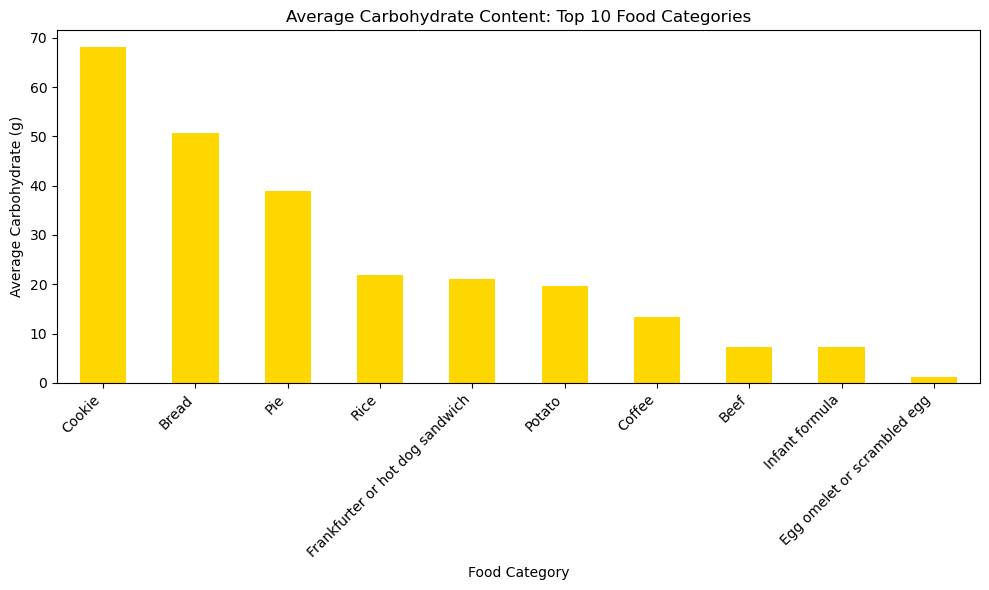

In [9]:
top_categories = data['Category'].value_counts().head(10).index
subset = data[data['Category'].isin(top_categories)]

avg_carb = subset.groupby('Category')['Data.Carbohydrate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_carb.plot(kind='bar', color='gold')
plt.title('Average Carbohydrate Content: Top 10 Food Categories')
plt.ylabel('Average Carbohydrate (g)')
plt.xlabel('Food Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#Interpretation: Nutritional Patterns by Food Category

#By repeating this analysis for protein, fat, and carbohydrates, we can see how different food types contribute to the macronutrient content of diets. High-protein foods cluster around animal products, while baked goods and processed foods tend to be higher in carbohydrates and/or fat. Visualizing by category helps identify trends that are useful for dietary planning and recommendation.

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features to cluster
top_categories = data['Category'].value_counts().head(10).index
subset = data[data['Category'].isin(top_categories)].copy()  # <--- .copy() removes the warning

features = subset[['Data.Protein', 'Data.Fat.Total Lipid', 'Data.Carbohydrate']].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
subset['Cluster'] = kmeans.fit_predict(X_scaled)

subset[['Description', 'Category', 'Data.Protein', 'Data.Fat.Total Lipid', 'Data.Carbohydrate', 'Cluster']].head(10)



,Description,Category,Data.Protein,Data.Fat.Total Lipid,Data.Carbohydrate,Cluster
190,"Infant formula, NFS",Infant formula,1.38,3.56,7.12,1
191,"Infant formula, NS as to form (Similac Expert ...",Infant formula,1.80,3.63,6.77,1
192,"Infant formula, ready-to-feed (Similac Expert ...",Infant formula,1.80,3.63,6.77,1
193,"Infant formula, powder, made with water, NFS (...",Infant formula,1.80,3.63,6.77,1
194,"Infant formula, powder, made with tap water (S...",Infant formula,1.80,3.63,6.77,1
195,"Infant formula, powder, made with plain bottle...",Infant formula,1.80,3.63,6.77,1
196,"Infant formula, powder, made with baby water (...",Infant formula,1.80,3.63,6.77,1
197,"Infant formula, NS as to form (Similac Advance)",Infant formula,1.37,3.62,6.87,1
198,"Infant formula, ready-to-feed (Similac Advance)",Infant formula,1.37,3.62,6.87,1
199,"Infant formula, liquid concentrate, made with ...",Infant formula,1.37,3.62,6.87,1


#In this step, we prepare the food nutrition dataset for a clustering analysis. We select the ten most common food categories in the data and focus on three key macronutrients: protein, fat, and carbohydrate. These features are standardized before using K-means clustering to assign each food to one of three nutrition-based clusters. This process helps uncover patterns in macronutrient profiles and allows us to group foods with similar nutritional characteristics.

In [11]:
# Show foods from another cluster, e.g., cluster 0
subset[subset['Cluster'] == 0][['Description', 'Category', 'Data.Protein', 'Data.Fat.Total Lipid', 'Data.Carbohydrate']].head(10)


,Description,Category,Data.Protein,Data.Fat.Total Lipid,Data.Carbohydrate
649,"Beef, NS as to cut, cooked, NS as to fat eaten",Beef,29.23,6.75,0.00
650,"Beef, NS as to cut, cooked, lean and fat eaten",Beef,27.06,13.44,0.00
651,"Beef, NS as to cut, cooked, lean only eaten",Beef,29.23,6.75,0.00
655,"Beef, pickled",Beef,18.17,18.98,0.47
656,"Beef, NS as to cut, fried, NS to fat eaten",Beef,29.23,6.75,0.00
675,"Beef, oxtails, cooked",Beef,30.80,13.19,0.00
676,"Beef, neck bones, cooked",Beef,29.87,19.06,0.00
677,"Beef, shortribs, cooked, NS as to fat eaten",Beef,30.50,17.98,0.00
678,"Beef, shortribs, cooked, lean and fat eaten",Beef,21.39,41.63,0.00
679,"Beef, shortribs, cooked, lean only eaten",Beef,30.50,17.98,0.00


In [12]:
import seaborn as sns

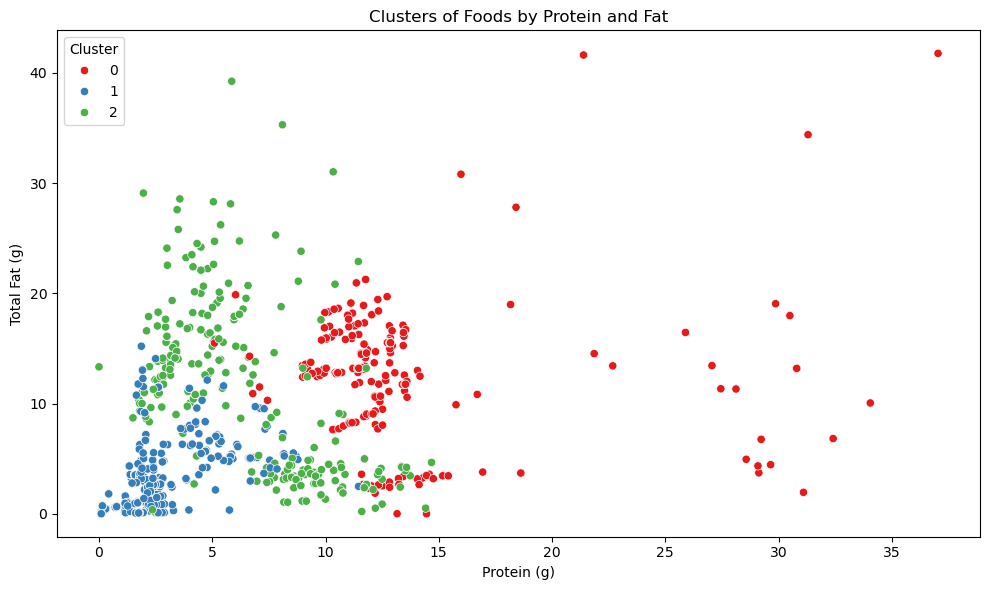

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=subset,
                x='Data.Protein',
                y='Data.Fat.Total Lipid',
                hue='Cluster',
                palette='Set1')
plt.title('Clusters of Foods by Protein and Fat')
plt.xlabel('Protein (g)')
plt.ylabel('Total Fat (g)')
plt.tight_layout()
plt.show()


#The scatter plot above displays the results of K-means clustering on foods from the most common categories in the dataset, based on their protein and total fat content. Each point is a food, and its color represents the cluster assigned by the algorithm.

#The visualization reveals distinct nutrient profiles one cluster primarily contains foods high in both protein and fat (often animal-based or processed), another groups items with low protein and fat (such as some infant formulas or lighter foods), and the third cluster lies between these extremes. Clustering helps simplify and highlight complex dietary data, making it clear which foods are nutritionally similar. This approach is valuable for recommendations, menu planning, or understanding broad patterns in the food supply.